In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import datetime
import time

## Matplotlib contd..

In [ ]:
#plot1 example
x = np.linspace(0, 10, 100)
fig2,ax = plt.subplots()
plt.style.use('seaborn-dark-palette')
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

In [ ]:
histx = np.random.randn(1000)
histy = np.random.randn(1000)

plt.hist2d(histx, histy, bins=30, cmap='Blues')

In [ ]:
#plot2 example
n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(histx, bins=n_bins)
axs[1].hist(histy, bins=n_bins)

The below code shows the anatomy of a matplotlib plotting area. These should be modified to customize plots in matplotlib. We may not always use all the elements shown in the anatomy, but most of them should be used to make a professional graph.  
These are also not the only way you can change the matplotlib plot features.If you are interested in other methods you can look it up [rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html) or [Style sheets](https://matplotlib.org/stable/gallery/style_sheets/index.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig, ax= plt.subplots(figsize=(7.5, 7.5))

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

Exercise: Add the important plot features in plot1 example and plot2 example the below code. If you notice it uses the style sheet format of using the color to automatically assign different colors to both distributions. The above code would still work for this exercise. You could define  
    - Title  
    - Axis label  
    - Gridlines  
    - Legend  
    - vertical lines

They should look like

![Alt text](Figures_tracks/solutionplot1.png)   ![Alt text](Figures_tracks/solutionplot2.png)

## Reading files from directory using regular expression and OS path library. This will allow us to read multiple files by using a matching schema.

In [ ]:
vehicledf=pd.read_csv('TracksGPS/2016/gps_2016_07_04_14_03_38.txt')


`Exercise 1`: Read the file data into a pandas dataframe. Use the first line to create a vehicleID column and use the second line to create the column name. Process the column names to remove any special characters or spaces. Convert the time column into a datetime object. The python packages you may find useful are  
-   [Regular expression](https://docs.python.org/3/library/re.html#text-munging)
-   [Datetime](https://docs.python.org/3/library/datetime.html#datetime.datetime.month)  
**Did you encounter an error? Can you print the lines which cause the error?**

In [ ]:
vehicledf.head()

`Exercise 2` : Add comments above each line of the below code and add brief explanation of what each of the called methods are used for where ever required.

In [ ]:
file_directory=(r"TracksGPS/2016")
appended_list=[]
files=os.listdir(file_directory)
vehicleName=[]
for file in files:
    # print(file)
    if not file.startswith('.') and file.startswith("gps"):
        # print(file)
        pathfile=os.path.join(file_directory,file)
        # print(pathfile)
        df=pd.read_csv(pathfile,skipfooter=1,engine='python')
        vehicle=df.columns[0].split('%')[1].split(":")[0].replace(" ","")
        vehicleName.append(vehicle)
        df=df.reset_index()
        df = df.rename(columns=df.iloc[0]).loc[1:]
        df['VehicleID']=vehicle
        print("the column names in the "+vehicle+" file are: ",list(df.columns))
        interesting_columns=['VehicleID','Time','Latitude','Longitude','Altitude','Speed'] 
        # print(df.head())
        appended_list.append(df)
print("the list of vehicles are: ",vehicleName)
tracks=pd.concat(appended_list)


Explanation of skipfooter: Each file stops with "% Stopped at timestamp" which causes error in converting the time column to datetime.  

![Screenshot 2023-06-24 195714_stoppedAtError.png](<attachment:Screenshot 2023-06-24 195714_stoppedAtError.png>)
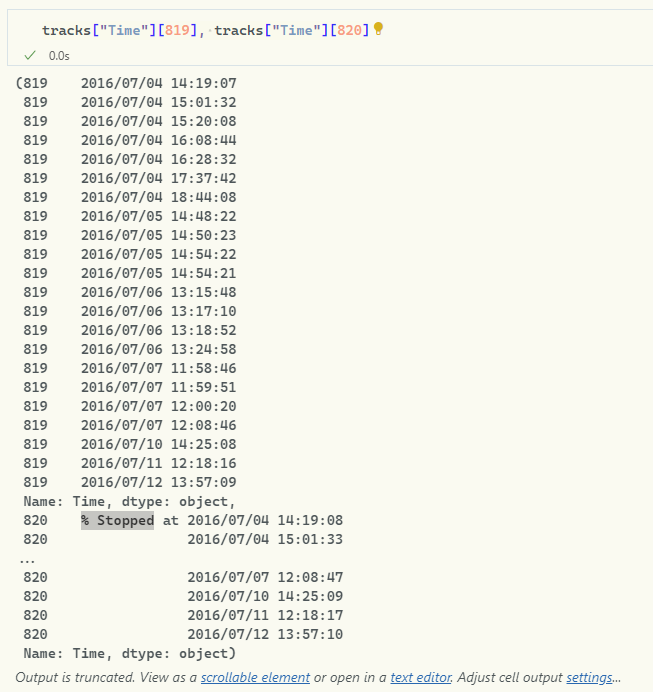

In [ ]:
tracks.dtypes

In [ ]:
tracks.columns = tracks.columns.str.replace(" ","")
tracks.columns = tracks.columns.str.replace("%","")
tracks['Time'] = pd.to_datetime(tracks['Time'])
tracks["altitude"]=tracks["altitude"].astype(float)
tracks["lat"]=tracks["lat"].astype(float)
tracks["lon"]=tracks["lon"].astype(float)
tracks["altitude"]=tracks["altitude"].round(2)
tracks.head()

In [ ]:
tracks['Time'].dtypes, tracks['Time'].dt.date, tracks['Time'].dt.time, tracks["Time"].dt.year, tracks["Time"].dt.month, tracks["Time"].dt.day, tracks["Time"].min(), tracks["Time"].max()

# Pivot table and Multi Indexing in python

In [ ]:
tracks["Day"]=tracks["Time"].dt.day

In [ ]:
tracks.head()

In [ ]:
#using set index to create a multi level index for the dataframe using columns VehicleID and Day
tracksMultiIndex=tracks.set_index(["VehicleID","Day"])


In [ ]:
tracksMultiIndex.index

In [ ]:
tracksMultiIndex.head()

In [ ]:
tracksMultiIndex.loc["Combinejoe2388"]

## Group By  
[ python package refrence](https://www.devdoc.net/python/pandas-1.1.3-docs/reference/groupby.html)

In [ ]:
tracksGroupBy=tracks.groupby(["VehicleID","Day"])["altitude"].mean().round(2)
tracksGroupBy

In [ ]:
tracks.groupby(["VehicleID","Day"])["altitude"].mean().round(2).unstack()

In [ ]:
tracks.groupby(["VehicleID","Day"])["altitude"].hist()

`Exercise 3`: Create a boxplot of the tracks data with subplots for each vehicleID grouped by Day.

# Pivot tables

`Exercise 4`: Find and correct the error raised by the python code in the next cell without loosing any data.  
        *hint*: You can use "loc" and "duplicated" function to point out the issue first.

In [ ]:
TracksPivoted = tracks.pivot(index=["Time"], columns="VehicleID", values=["lat","lon","altitude","speed"])

**Hint**:Time is the marking of an event with respect to a reference origin. A time interval is a measurement of duration. The time of an event might be measured by hours, minutes, seconds, and a calendar date, while a time interval might be measured by the number of seconds between two events. Coordinated Universal Time (UTC) is a time system adopted by many countries in 1972. UTC is coordinated by the Bureau International des Poids et Mesures (BIPM) in France and is based on the weighted combination of atomic clocks located around the world.  
![Alt text](Figures_tracks/GPStime.png)                                                                            
`GPS time` is a precise time standard that is related to UTC. 
The major difference is that GPS time is  
a continuous time usually measured in weeks and seconds form  
the GPS time zero point of midnight, January 5, 1980.   
Controlled by UTC, GPS time is not corrected with leap seconds,  
and so is currently ahead of UTC by six seconds (1990).   
With the exception of the integer number of leap seconds,  
GPS time is steered to within one microsecond of UTC   
with the difference reportedin the GPS navigation   
message to a precision of 90 nanoseconds. [Source](https://ilrs.gsfc.nasa.gov/docs/timing/gpsrole.pdf)
 

In [ ]:
tracks.pivot_table(index="Day", columns="VehicleID", values="altitude", aggfunc="mean")


## Indexing using these grouping formats

In [ ]:
tracks.groupby(["VehicleID","Day"]).plot(x="lat",y="lon",kind="scatter",figsize=(6,4),title="Tracks of Vehicles")

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for i, g in tracks.groupby(["VehicleID","Day"]):
    g.plot(x='lat', y='lon', ax=ax, label=str(i))
plt.title("Tracks of Vehicles")
plt.show()

`Exercise`: Debug the below code.

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for i, g in tracks.groupby(["VehicleID"]):
    print(str(i[0]))
    for index2, group2 in g.groupby(["Day"]):
        # print(index2, group2.dtypes)
        group2.plot(x='lat', y='lon', ax=ax, label=str(index2[0]))
    plt.title("tracks for vehicles "+str(i[0]))
    plt.show()

`Ecercise`: Plot and infer the movement of vehicles on each day. Use line types to differentiate between each vehicle ID for each day.